In [1]:
using Distributions
using StatsPlots
using StatsBase: ecdf

default(size=(400, 300), titlefontsize=10, tickfontsize=6)
plot(sin);

In [2]:
function welchstat(X, Y)
    m, n = length(X), length(Y)
    m, X̄, sX² = length(X), mean(X), var(X)
    n, Ȳ, sY² = length(Y), mean(Y), var(Y)
    sX̄², sȲ² = sX²/m, sY²/n
    s² = sX̄² + sȲ²
    T = (X̄ - Ȳ)/√s²
    ν = s²^2/(sX̄²^2/(m-1) + sȲ²^2/(n-1))
    T, ν
end
welchstat((X, Y)) = welchstat(X, Y)

function pvalwelch(X, Y)
    T, ν = welchstat(X, Y)
    2ccdf(TDist(ν), abs(T))
end
pvalwelch((X, Y)) = pvalwelch(X, Y)

function plotwelch(; distX = Normal(), distY = Normal(), m = 100, n = 100, L = 10^5)
    samples = [(rand(distX, m), rand(distY, n)) for _ in 1:L]
    pvals = pvalwelch.(samples)

    P = plot(x -> ecdf(pvals)(x), 0, 1; label="")
    plot!([0, 1], [0, 1]; label="", c=:black, ls=:dot)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xlabel="α", ylabel="probability of rejecting null")

    Q = plot(x -> ecdf(pvals)(x), 0, 0.1; label="")
    plot!([0, 0.1], [0, 0.1]; label="", c=:black, ls=:dot)
    plot!(xtick=0:0.01:0.1, ytick=0:0.01:0.1)
    plot!(xlabel="α", ylabel="probability of rejecting null")

    plot(P, Q; size=(600, 300))
end

plotwelch (generic function with 1 method)

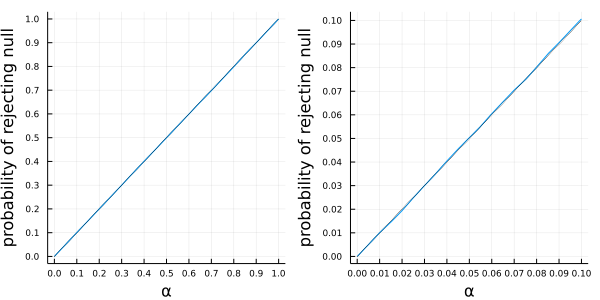

In [3]:
plotwelch(distX = Normal(), distY = Normal(), m = 50, n = 100, L = 10^5)

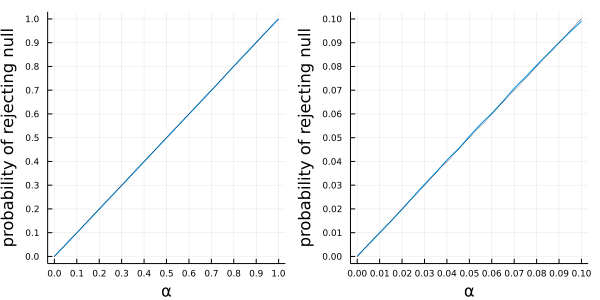

In [4]:
plotwelch(distX = Normal(), distY = Normal(0, 2), m = 50, n = 100, L = 10^5)

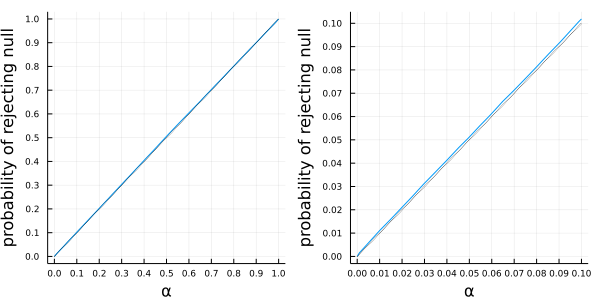

In [5]:
plotwelch(distX = Exponential(), distY = Exponential(), m = 50, n = 100, L = 10^5)

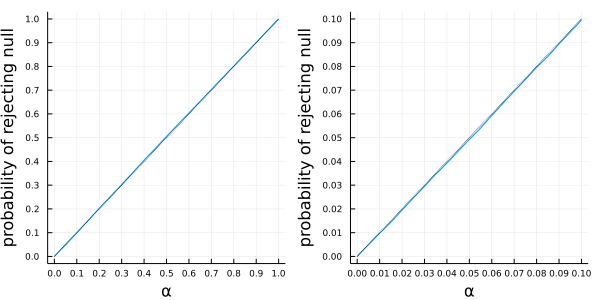

In [6]:
plotwelch(distX = Exponential(), distY = LocationScale(-1, 1, Exponential(2)), m = 50, n = 100, L = 10^5)

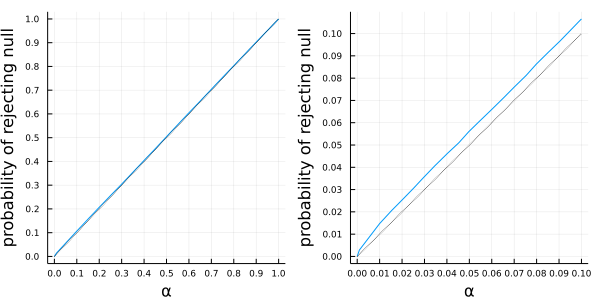

In [7]:
plotwelch(distX = Gamma(1, 2), distY = Gamma(2, 1), m = 50, n = 100, L = 10^5)

In [8]:
using Base64
showimg(mime, fn; tag="img") = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<$tag src="data:$mime;base64,$base64" />""")
end

showimg (generic function with 1 method)

https://twitter.com/genkuroki/status/1349860242398408704


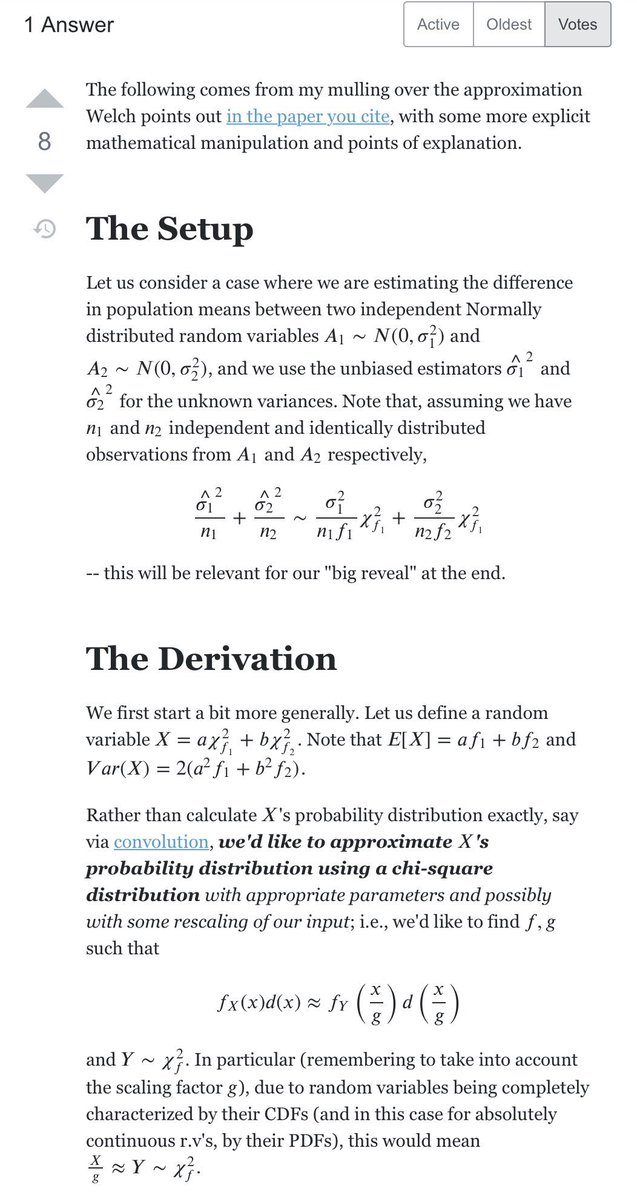

In [9]:
showimg("image/jpeg", "7FB7456A-A70C-433E-B362-4D21B8B02552.jpeg"; tag="img width=70%")


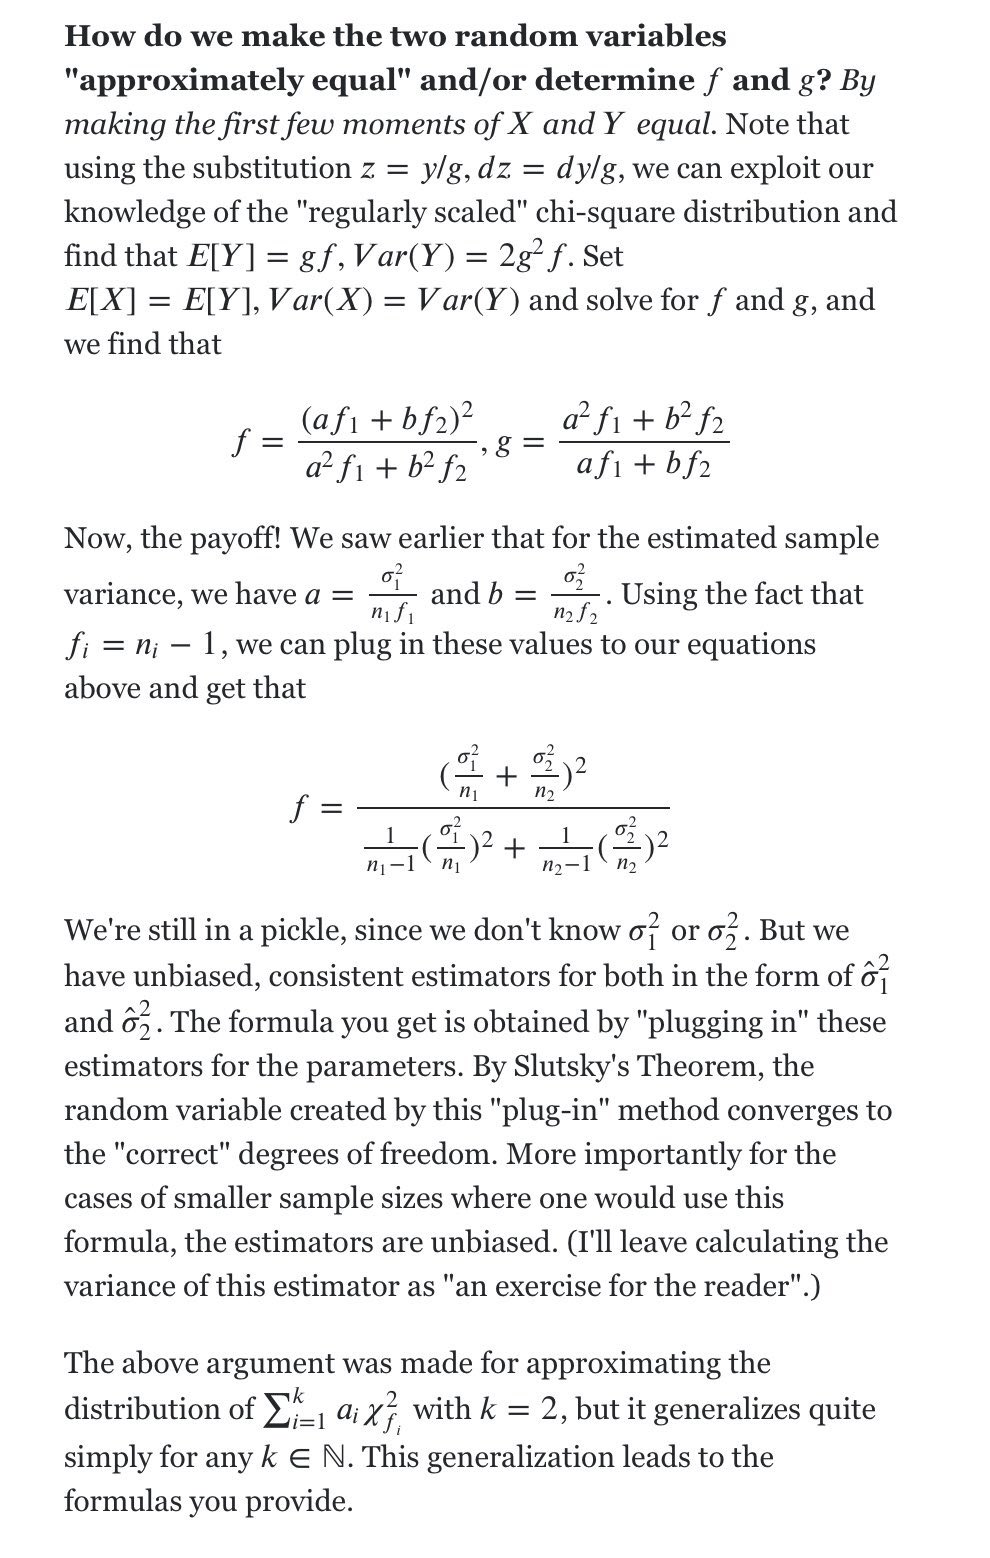

In [10]:
showimg("image/jpeg", "85F353FE-2F3E-48D5-B2B0-8457B4C3000B.jpeg"; tag="img width=70%")


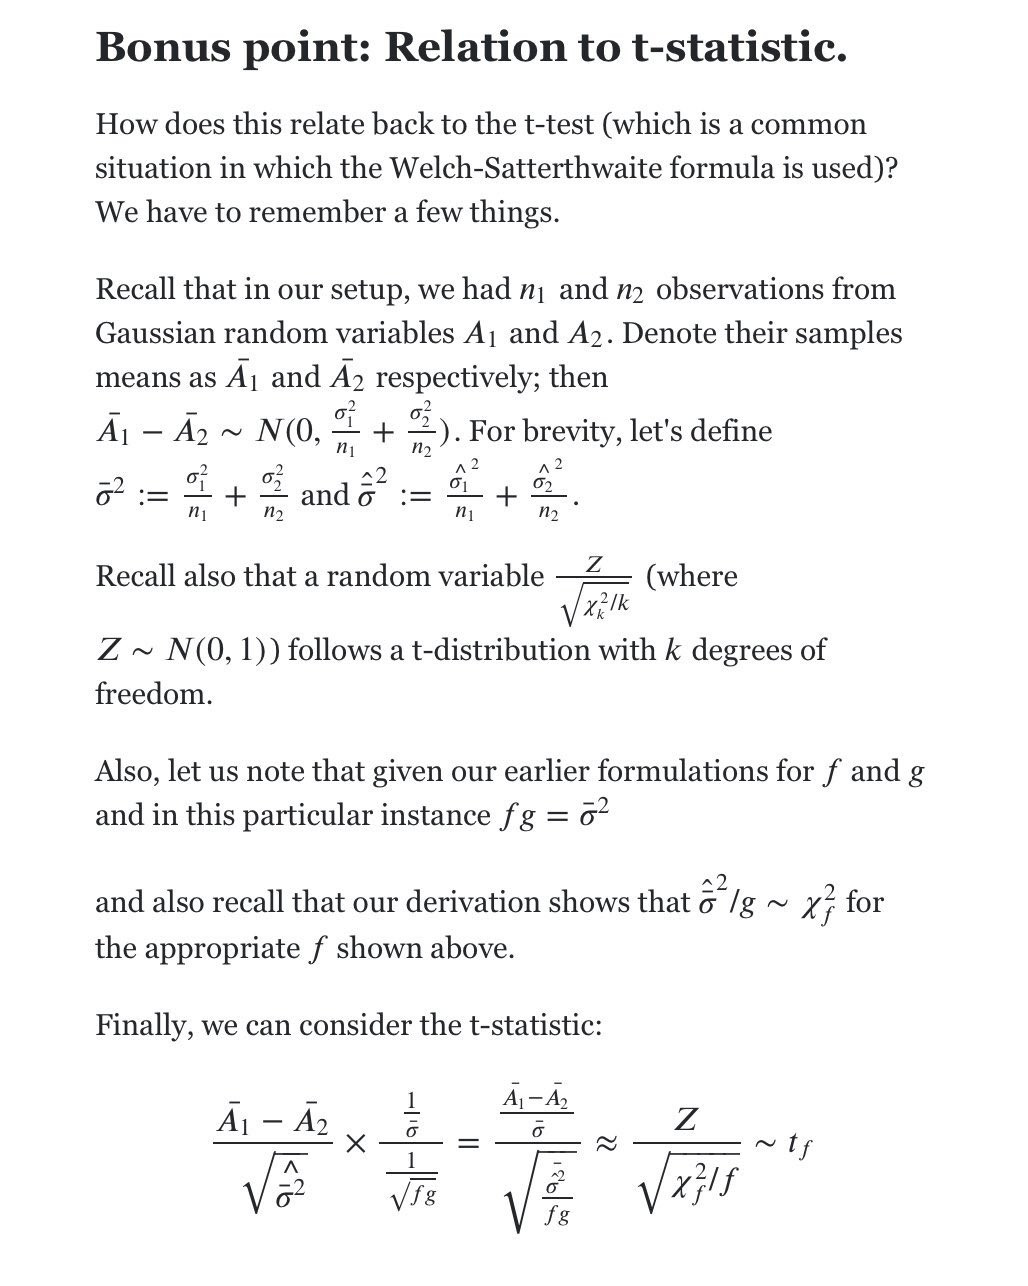

In [11]:
showimg("image/jpeg", "DD9EA01C-4784-4C54-BD44-40EB530A88EE.jpeg"; tag="img width=70%")


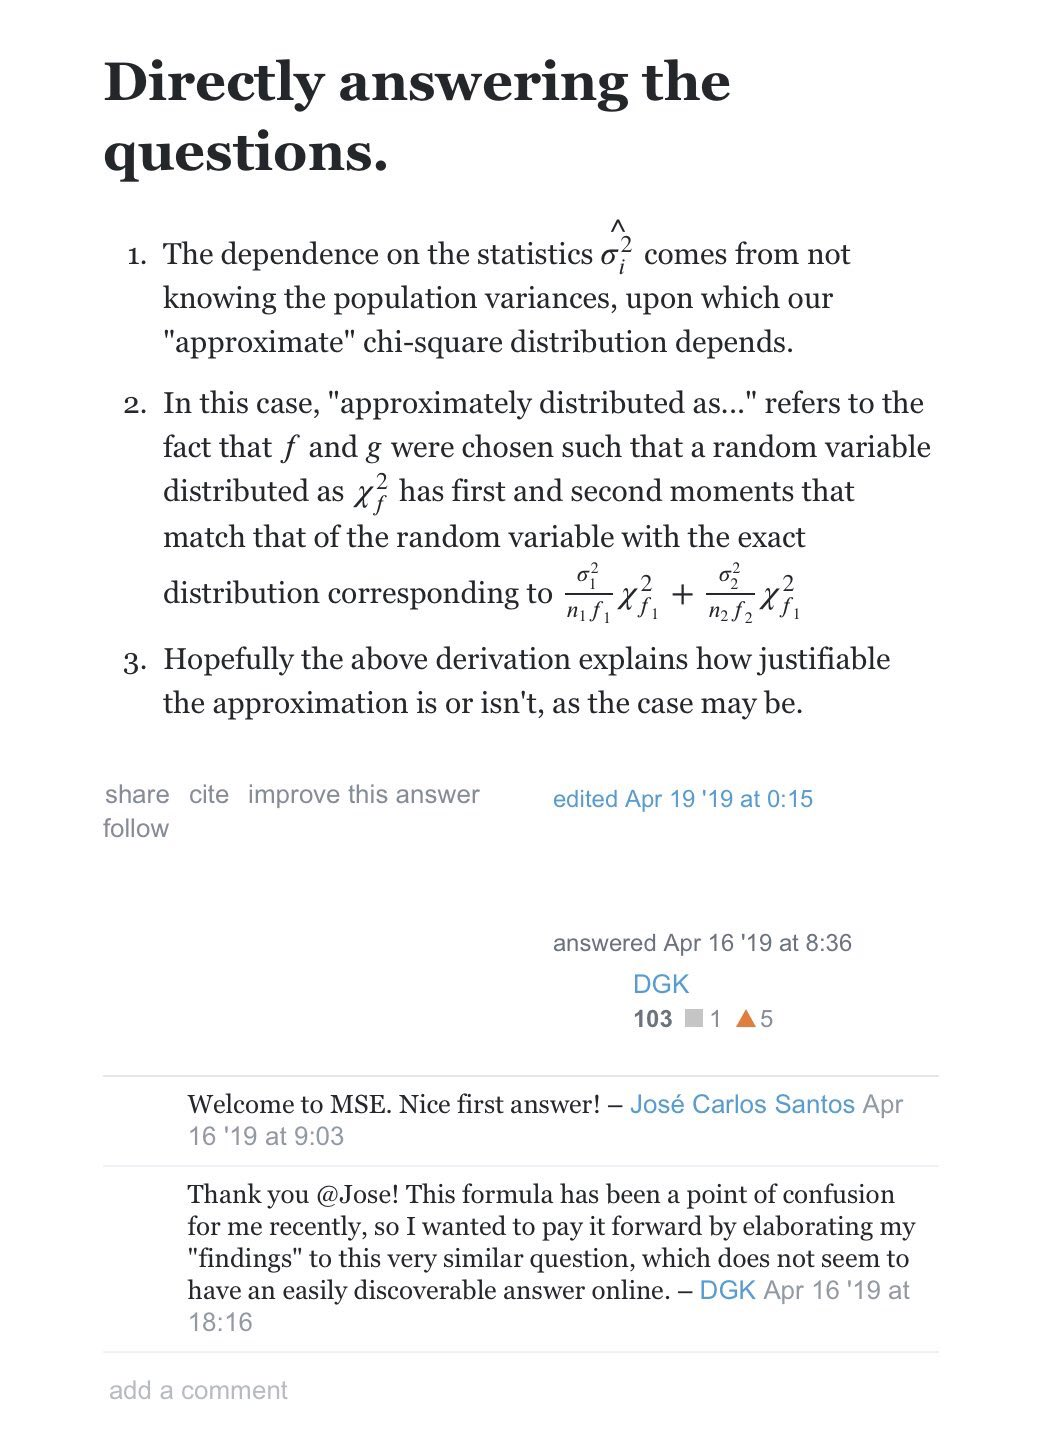

In [12]:
showimg("image/jpeg", "7EFCAF49-8C9E-4DAF-92A1-F58B5671DDFB.jpeg"; tag="img width=70%")